In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# Parâmetros
latitude = -32  
viscosidade = 0.06  
densidade = 1024  
velocidade_vento = 10  

# Cálculos
f = 2 * 7.2921e-5 * np.sin(np.abs(latitude) * np.pi/180)
D = np.sqrt(2 * viscosidade / np.abs(f))
tensao_vento = 1.225 * 1.4e-3 * velocidade_vento**2
u0 = tensao_vento / (densidade * np.sqrt(viscosidade * np.abs(f)))

In [7]:
num_niveis = 30
profundidades = np.linspace(0, np.pi*D, num_niveis)
theta = np.deg2rad(165) - profundidades/D 

u = u0 * np.exp(-profundidades/D) * np.sin(theta)
v = u0 * np.exp(-profundidades/D) * np.cos(theta)

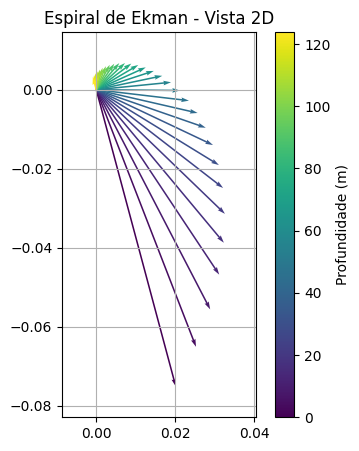

In [8]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
Q = ax1.quiver(np.zeros(num_niveis), np.zeros(num_niveis), u, v,
              scale=1.0, scale_units='xy', angles='xy',
              color=plt.cm.viridis(profundidades/np.max(profundidades)),
              width=0.008)
margin = 0.1 * u0
ax1.set_xlim([min(u)-margin, max(u)+margin])
ax1.set_ylim([min(v)-margin, max(v)+margin])
ax1.set_aspect('equal')
ax1.grid(True)

# Colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=np.pi*D))
sm.set_array(profundidades)
fig1.colorbar(sm, ax=ax1, label='Profundidade (m)')
plt.title('Espiral de Ekman - Vista 2D')
plt.show()

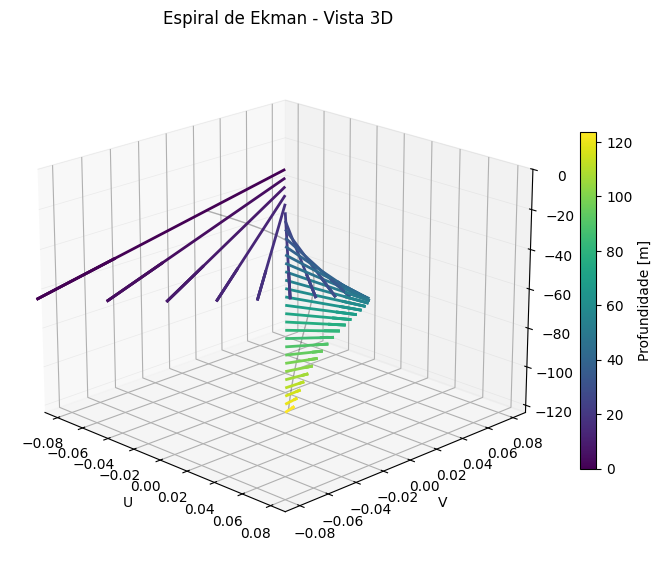

In [9]:
fig2 = plt.figure(figsize=(7, 6))
ax2 = fig2.add_subplot(111, projection='3d')
#linha central
ax2.plot(u, v, -profundidades, 'k-', alpha=0.3, linewidth=1)

#vetores
length_factor = 0.7 * np.pi*D / num_niveis  
ax2.quiver(np.zeros(num_niveis), np.zeros(num_niveis), -profundidades,
           u, v, np.zeros(num_niveis),
           length=length_factor, normalize=False,
           color=plt.cm.viridis(profundidades/np.max(profundidades)),
           arrow_length_ratio=0.3, linewidth=2)

# Ajuste automático dos limites
max_uv = max(np.max(np.abs(u)), np.max(np.abs(v))) * 1.2
ax2.set_xlim([-max_uv, max_uv])
ax2.set_ylim([-max_uv, max_uv])
ax2.set_zlim([-np.pi*D, 0])

ax2.set_xlabel('U', fontsize=10)
ax2.set_ylabel('V', fontsize=10)
ax2.set_zlabel('Profundidade [m]', fontsize=10)
ax2.set_title('Espiral de Ekman - Vista 3D', fontsize=12)

ax2.zaxis._axinfo['grid']['color'] = (0.7, 0.7, 0.7, 0.2)
ax2.zaxis._axinfo['grid']['linewidth'] = 0.5

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=np.pi*D))
sm.set_array(profundidades)
fig2.colorbar(sm, ax=ax2, shrink=0.6, label='Profundidade [m]')

ax2.view_init(elev=20, azim=-45)  
plt.tight_layout()
plt.show()